*파이썬 머신러닝 완벽가이드 p.308~p.337*

*ch5.1~5*

# **CHAPTER 05. 회귀**



### **01. 회귀 소개**

- 회귀: 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는
기법.
- 머신러닝 회귀 예측의 핵심: 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것
- 회귀 유형

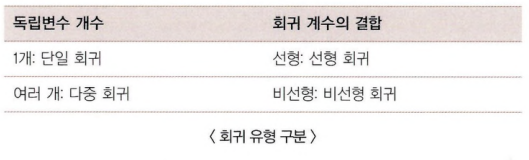

- 지도학습
    - 분류: 예측값이 카테고리와 같은 이산형 클래스 값
    - 회귀: 예측값이 연속형 숫자 값

- 대표적인 선형 회귀 모델
    - 일반 선형 회귀: 예측값과 실제 값의 RSS를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델
    - 릿지(Ridge): 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델.

    ( L2 규제: 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델 )
    - 라쏘(Lasso): 라쏘 회귀는 선형 회귀에 L1 규제를 적용한 방식.
    
    ( L1 규제: 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 함 )
    - 엘라스틱넷(티asticNet): L2, L1 규제를 함께 결합한 모델.
    L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정함.
    - 로지스틱 회귀(Logistic Regression): 분류에 사용되는 선형 모델.
    
    ( 일반적으로 이진 분류뿐만 아니라 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임 )



### **02. 단순 선형 회귀를 통한 회귀 이해**

- 단순 선형 회귀: 독립변수도 하나, 종속변수도 하나인 선형 회귀

- 최적의 회귀모델 만들기: 전체 데이터의 잔차(오류 값)합이 최소가 되는 모델 만든다는 의미 = 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미

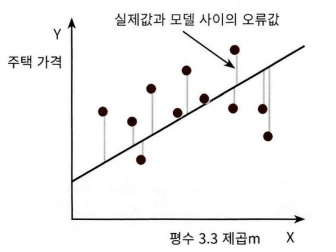

- Error^2 = RSS

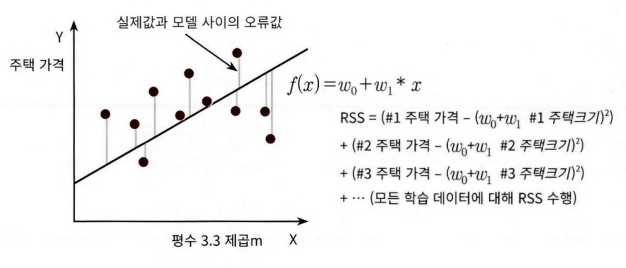

- 회귀에서 이 RSS는 비용(Cost)이며 w변수(회귀 계수)로 구성되는 RSS를 비용 함수(손실 함수)라고 함. 머신러닝 회귀 알고리즘은 최소의 오류 값을 구하는 것.

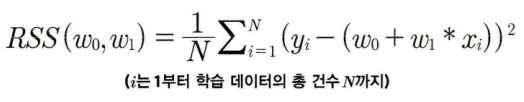

### **03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**

- 경사 하강법: 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식.

- 지속해서 오류를 감소시키는 방향으로 W 값을 계속 업데이트하다가, 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 W 값을 최적 파라미터로 반환함.

- ex) 비용 함수가 다음 그림과 같은 포물선 형태의 2차 함수라면 경사 하강법은
최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트함. 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 W를 반환.

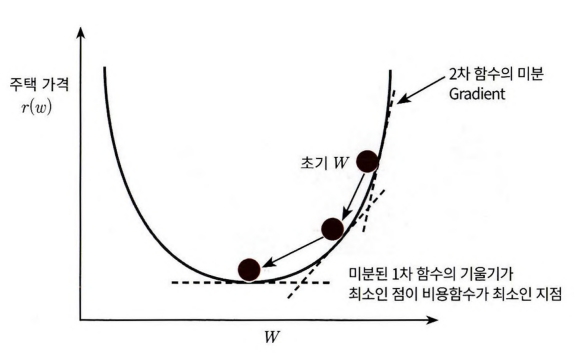

- 비용 함수 RSS = R(w)로 지칭.
- R(w)는 변수가 W 파라미터로 이뤄진 함수이며, R(w)를 미분해서 미분함수의 최솟
값을 구해야 함.
- R(W)는 두 개의 w 파라미터를 가지고 있기 때문에 각 변수에 편미분을 적용해야함.

- R(w)를 w1, w0으로 편미분한 결과

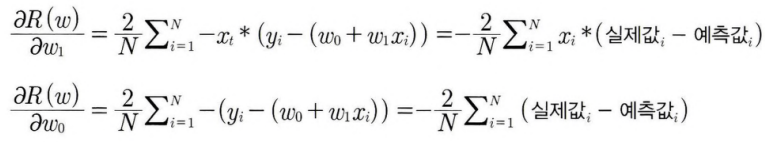

- 업데이트는 새로운 W1을 이전 W1에서 편미분 결괏값을 마이너스(-)하면서 적용.
- 위 편미분값이 너무 클 수 있기 때문에 보정 계수 n(학습률)을 곱함.

####<경사하강법 과정>

1. w1,w0를 임의의 값으로 설정하고 첫 비용 함수의 값을 계산
2. w1,w0를 업데이트한 후 다시 비용 함수의 값을 계산
3. 비용 함수가 감소하는 방향성으로 주어진 횟수만큼 Step 2를 반복하면서 w1,w0를 계속 업데이트.

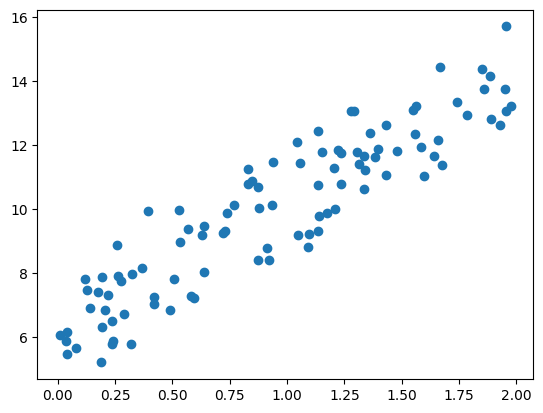

In [15]:
# 경사 하강법을 구현
# y = 4X + 6을 근사하기 위한 100개의 데이터 세트를 만들고, 여기에 경사 하강법을 이용해 회귀계수 도출

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X+np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

In [16]:
# 비용 함수 정의

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

In [17]:
# w1과 w0를 업데이트할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    return w1_update, w0_update

In [18]:
# get_weight_updates()을 경사 하강 방식으로 반복적으로 수행하여 w1과 wO를 업데이트하는 함수인 gradient_descent_steps() 함수를 생성

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1 과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1 을 모두 0으로 초기화.
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [19]:
# RSS 차이를 계산하는 get_cost() 함수를 생성

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))


w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


-> 실제 선형식인 y = 4X + 6과 유사하게 w1: 4.022, w0: 6.162가 도출됨.

->예측 오류 비용: 약 0.9935

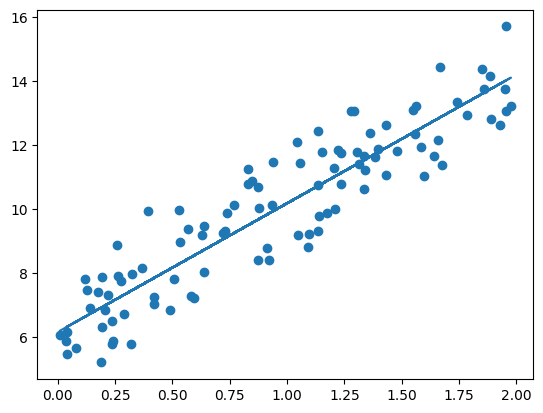

In [20]:
# 앞에서 구한 y_pred에 기반해 회귀선 그리기

plt.scatter(X, y)
plt.plot(X, y_pred)

---

경사 하강법: 수행 시간이 매우 오래 걸림.

-> 실전에서는 대부분 확률적 경사 하강법(Stochastic Gradient Descent) 이용.

확률적 경사 하강법: 일부 데이터만 이용해 W가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠름.

In [21]:
# (미니 배치) 확률적 경사 하강법을 stochastic_gradient_descent_steps() 함수로 구현
# 차이점: 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계산함.

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sampler로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1,w0

In [22]:
# w1, wO 및 예측 오류 비용 계산

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0, 0], 3), "w0:", round(w0[0, 0], 3))
y_pred = w1[0, 0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


-> 큰 예측 성능상의 차이가 없음.

-> 큰 데이터를 처리할 경우에는 경사 하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법 이용.

---

> 피처가 여러 개인 경우

- 데이터의 개수가 N이고 피처 M개의 입력 행렬

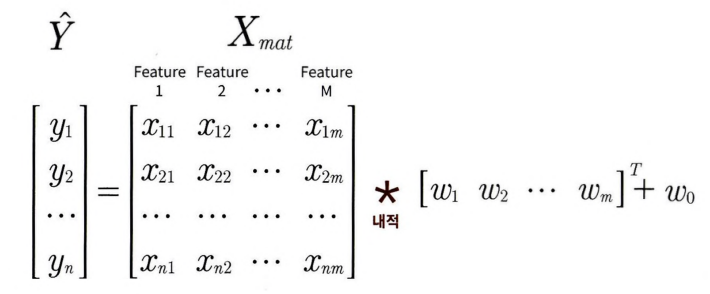

- w0를 Weight의 배열인 W안에 포함시키기 위해서 Xmat의 맨 처음 열에 모든 데이터의 값이 1 인 피처 Feat0을 추가

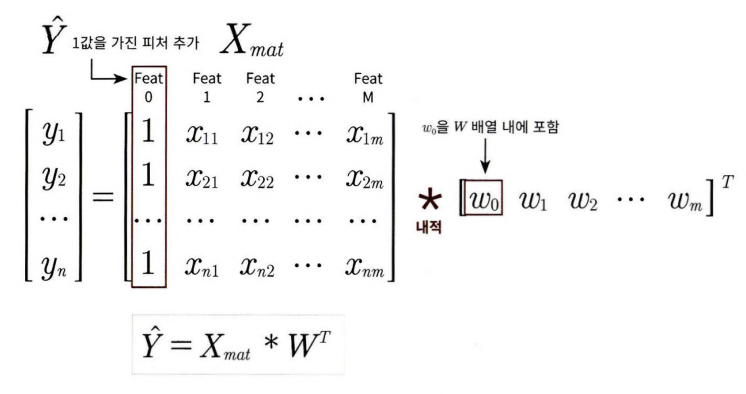

###**04. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

**[ LinearRegression 클래스 一 Ordinary Least Squares ]**

- LinearRegression 클래스: 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스.
- fit() 메서드로 X, y 배열을 입력받으면 회귀 계수(Coefficients)인 W를 coef_속성에 저장.

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)

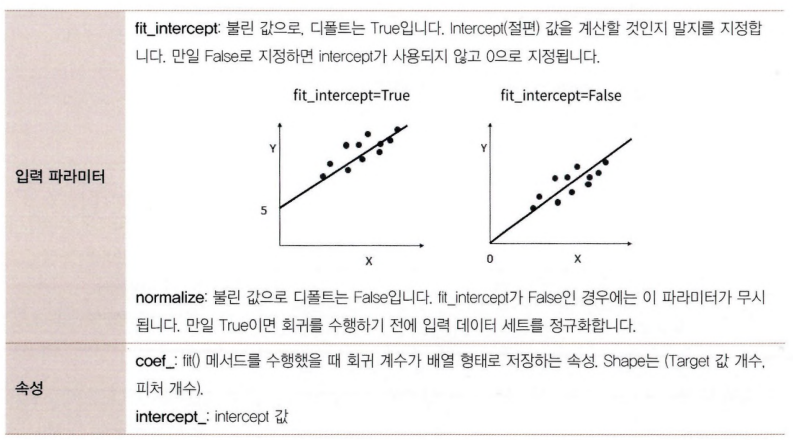

- 다중 공선성(multi-collinearity) 문제: 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해지는 현상.
- 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용. 또한 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행.

**[ 회귀 평가 지표 ]**

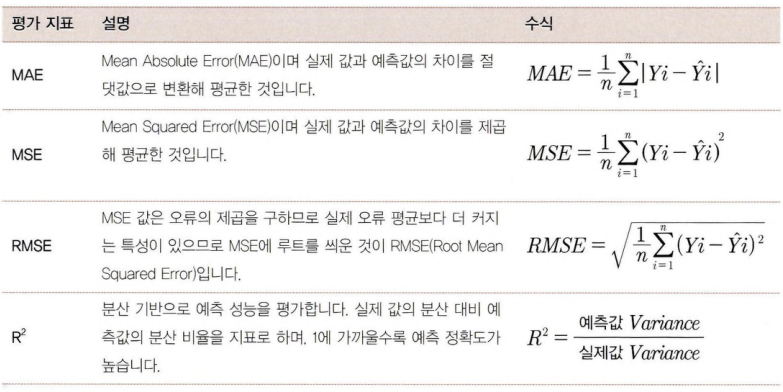

이 밖에 MSE나 RMSE에 로그를 적용한 MSLE(Mean Squared Log Error)와 RMSLE(Root Mean Squared Log Error)도 사용.

- 사이킷런은 RMSE를 제공하지 않음 -> RMSE를 구하기 위해서는 MSE에 제곱근을 씌워서 계산하는 함수를 만들어야 함.
- 0.22 버전부터는 RMSE를 위한 함수를 제공 -> MSE를 위한 metrics.mean_squared_error() 함수를 그대로 사용하되, squared
파라미터를 False로 지정해 사용

- 각 평가 방법에 대한 사이킷런의 API 및 cross_val_score나 GridSearchCV에서 평가 시 사용되는 scoring 파라미터의 적용 값

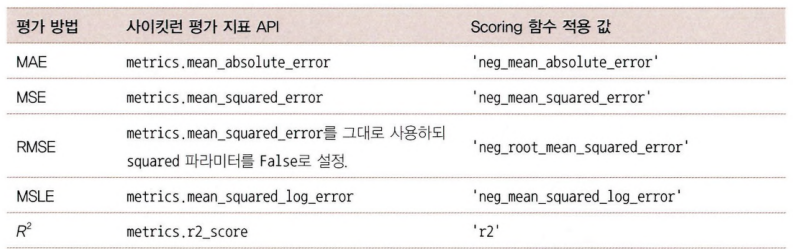

- 회귀 평가 지표를 적용할 때 유의할 점

    (cross_val_score, GridSearchCV와 같은 Scoring 함수에)

- ex) MAE의 scoring 파라미터 값 'neg_mean_absolute_error'
- 'neg_'라는 접두어: Negative(음수) 값을 가진다는 의미.
    사이킷런의 Scoring 함수가 score값이 클수록 좋은 평가 결과로 자동 평가하기 때문
    
- 그런데 실제 값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표의 경우 값이 커지면 오히려 나쁜 모델이라는 의미이므로 이를 사이킷런의 Scoring 함수에 일반적으로 반영하려면 보정 필요 -> -1을 원래의 평가 지표 값에 곱해서 음수(Negative)를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 함.

- metrics.mean_absolute_error( )와 같은 사이킷런 평가 지표 API는 정상적으로 양수의 값을 반환하지만 Scoring 함수의 scoring 파라미터 값 'neg_mean_absolute_error'가 의미하는 것은 -1 * metrics.mean_absolute_error()임.

---

**[ LinearRegressionS 이용해 보스턴 주택 가격 회귀 구현 ]**

- 보스턴 주택 가격 데이터

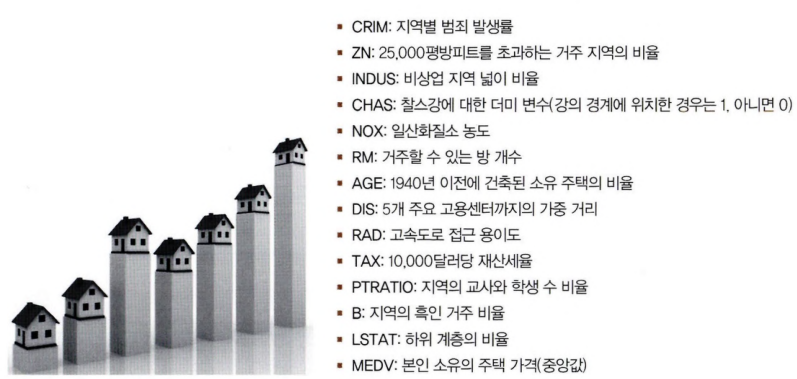

In [24]:
import numpy as np
import matplotlib.pyplot as pit
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

boston = pd.read_csv('boston.csv')
bostonDF = boston.drop('MEDV', axis=1)

bostonDF['PRICE'] = boston.MEDV
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


-> 데이터 세트 피처의 Null 값은 없으며 모두 float 형

- 각 칼럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화
- 총 8개의 칼럼에 대해 값이 증가할수록 PRICE 값이 어떻게 변하는지 확인

- 시본(Seaborn)의 regplot() 함수: X, Y 축 값의 산점도와 함께 선형 회귀 직선을 그려줌.
- matplotlib.subplots(): 각 ax마다 칼럼과 PRICE의 관계를 표현.
- matplotlib의 subplots(): 여러 개의 그래프를 한 번에 표현.
    - 인자로 입력되는 ncols는 열 방향으로 위치할 그래프의 개수이며, nrows는 행 방향으로 위치할 그래프의 개수.

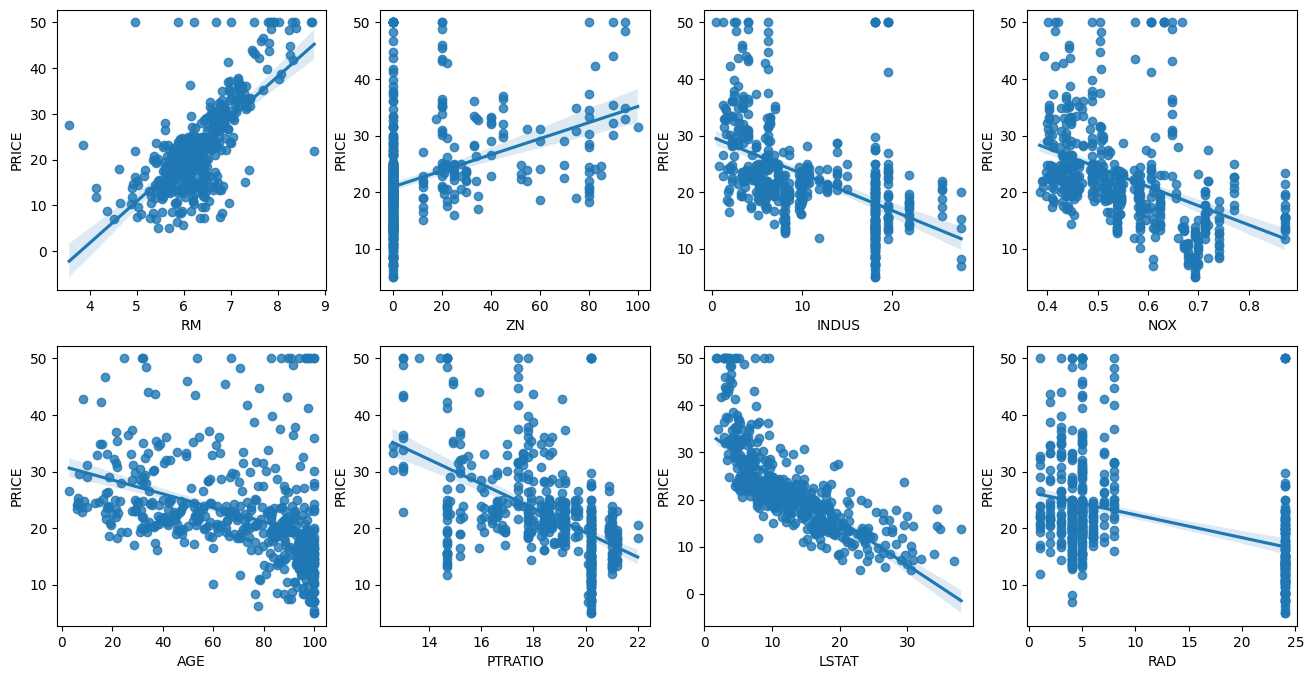

In [25]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐 .
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

-> 다른 칼럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러짐.

-> RM(방 개수)은 양 방향의 선형성(Positive Linearity)이 가장 큼 -> 방의 크기가 클수록 가격이 증가하는 모습.

-> LSTAT(하위 계층의 비율)는 음방향의 선형성 (Negative Linearity)이 가장 큼 -> LSTAT이 적을 수록 PRICE가 증가하는 모습.

In [26]:
# LinearRegression 클래스를 이용해 보스턴 주택 가격의 회귀 모델 만들기

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [29]:
# LinearRegression으로 생성한 주택가격 모델의 intercept(절편)과 coefficients(회귀 계수) 값
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [30]:
# 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
AGE,0.0
TAX,-0.0
B,0.0
CRIM,-0.1
LSTAT,-0.6


-> RM이 양의 값으로 회귀 계수가 가장 큼

-> NOX 피처의 회귀 계수 - 값이 너무 커 보임

---

- 5개의 폴드 세트에서 cross_val_score( )를 이용해 교차 검증으로 MSE와 RMSE를 측정.

사이킷런은 RMSE를 제공하지 않으므로 MSE 수치 결과를 RMSE로 변환해야 함. cross_val_score() 의 인자로 scoring:'neg_mean_squared_error'를 지정하면 반환되는 수치 값은 음수 값.

- 사이킷런의 지표 평가 기준: 높은 지표 값일수록 좋은 모델.

- 회귀: MSE 값이 낮을수록 좋은 회귀 모델.

사이킷런의 metric 평가 기준에 MSE를 부합시키기 위해서 scoring:'neg_mean_squared_error'로 사이킷런의 Scoring 함수를 호출하면 모델에서 계산된 MSE 값에 -1을 곱해서 반환 -> 따라서 cross_val_score( )에서 반환된 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 계산된 MSE 값이 됨.

이렇게 다시 변환된 MSE값에 넘파이의 sqrt() 함수를 적용 -> RMSE 값

In [32]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
Ir = LinearRegression()

# cross_val_score( )로 5 폴드 세트로 MSE 를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="negjnean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE:{0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE:5.829


-> 평균 RMSE는 약 5.829

-> cross_val_score (scoring="neg_mean_squared_error")로 반환된 값을 확인해 보면 모두 음수임을 알 수 있음.

###**05. 다항 회귀와 과(대)적합/과소적합 이해**

[ 다항 회귀 이해 ]

- 다항(Polynomial) 회귀: 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것

- 다항 회귀는 선형 회귀.

    회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관함.



---

- 사이킷런은 PolynomialFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환.

- PolynomialFeatures 클래스:
    - degree 파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는
다항식 피처로 변환.
    - fit(), transform() 메서드를 통해 변환 작업을 수행.

In [33]:
# PolynomialFeatures를 이용해 단항값을 2차 다항값으로 변환

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0, 1], [2, 3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:\n', X)

# degree=2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


-> PolynomialFeatures 클래스가 단항식 값을 다항식 값으로 변경하는 법

---

- 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도

In [35]:
# 3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수를 예측
# 함수 polynomial_func() 생성: 3차 다항 계수 피처 값이 입력되면 결정 값을 반환

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


- 일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현됨

In [36]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape: ', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape:  (10,)


-> 일차 단항식 계수 피처는 2개였지만, 3차 다항식 Polynomial 변환 이후에는 다항식 계수 피처가 10개로 늘어남.

-> 이 피처 데이터 세트에 LinearRegression을 통해 3차 다항 회귀 형태의 다항 회귀를 적용하면 회귀 계수가 10개로 늘어남.

-> 원래 다항식의 계수 값인 [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]와는 차이가 있지만 다항 회귀로 근사하고 있음.

-> 이처럼 사이킷런은 PolynomialFeatures로 피처를 변환한 후에 LinearRegression 클래스로 다항 회귀를 구현함.

In [37]:
# 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


**[ 다항 회귀를 이용한 과소적합 및 과적합 이해 ]**

- 다항 회귀: 복잡한 다항 관계를 모델링할 수 있음. 다항식의 차수가
높아질수록 매우 복잡한 피처 간의 관계까지 모델링 가능.

- 차수가 높아질수록 과적합의 문제가 크게 발생.

---

<소스 코드>

원래 데이터 세트는 피처 X와 target y가 잡음(Noise)이 포함된
다항식의 코사인(Cosine) 그래프 관계를 가지도록 만듦.

이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도를 비교하는 예제.

- 학습 데이터:
    - 30개의 임의의 데이터 X
    - X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi*X)

# X는 0부터 1 까지 30개의 임의의 값을 순서대로 샘플링한 데이터.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

- 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과를 비교
-  다항식 차수별로 학습을 수행한 뒤 cross_val_score()로 MSE 값을 구해 차수별 예측 성능을 평가
- 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선 그리기


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56423894 입니다.


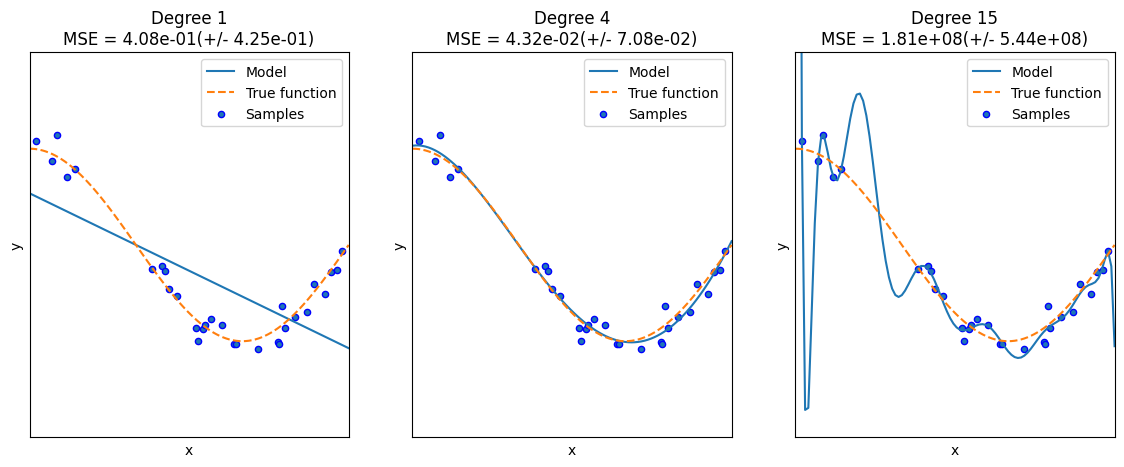

In [40]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)

    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print("\nDegree {0} 회귀 계수는 {1} 입니다.".format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np. mean (scores)))

    # 0 부터 1 까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)

    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label="Model")
    # 실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc="best")

    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 실선으로 표현된 예측 곡선: 다항 회귀 예측 곡선
- 점선으로 표현된 곡선: 실제 데이터 세트 X, Y의 코사인 곡선
- 학습 데이터: 0부터 1까지의 30개의 임의의 X 값과 그에 따른 코사인 Y값에 잡음을 변동 값으로 추가해 구성
- MSE(Mean Squared Error) 평가: 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것

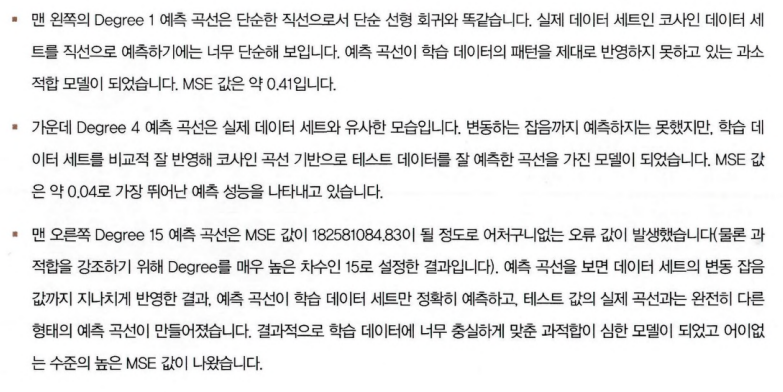

- Degree 15의 회귀 계수:Degree 1, 4와 비교할 수 없을 정도로 매우 큰 값임
- Degree 15라는 복잡한 다항식을 만족하기 위해 계산된 회귀 계수는 결국 현실과 너무 동떨어진 예측 결과를 보여줌.

-> 결국 좋은 예측 모델: 학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌(Balanced) 모델

---

**[ 편향-분산 트레이드오프(Bias-Variance Trade off) ]**

- 편향-분산 트레이드오프: 머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나.

- 앞의 Degree 1과 같은 모델: 매우 단순화된 모델 & 지나치게 한 방향성으로 치우친 경향 = 고편향(High Bias)성

- 반대로 Degree 15와 같은 모델: 매우 복잡한 모델 & 지나치게 높은 변동성 = 고분산(High Variance)성

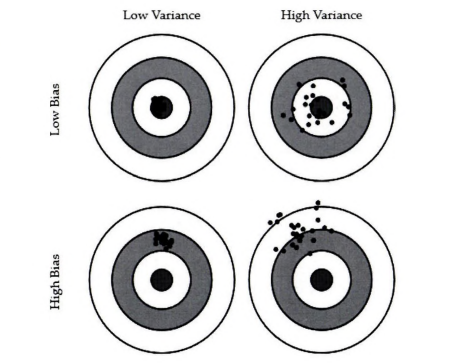

- 저편향/저분산(Low Bias/Low Variance):
    - 예측 결과가 실제 결과에 매우 잘 근접
    - 예측 변동이 크지 않고 특정 부분에 집중
    - BEST!!

- 저편향/고분산(Low Bias/High Variance):
    - 예측 결과가 실제 결과에 비교적 근접
    - 예측 결과가 실제 결과를 중심으로 꽤 넓은 부분에 분포
    
- 고편향/저분산(High Bias/Low Variance):
    - 정확한 결과에서 벗어남
    - 예측이 특정 부분에 집중됨
    
- 고편향/고분산(High Bias/High Variance):
    - 정확한 예측 결과를 벗어남
    - 넓은 부분에 분포

---

- 편향과 분산의 관계에 따른 전체 오류 값(Total Error)의 변화

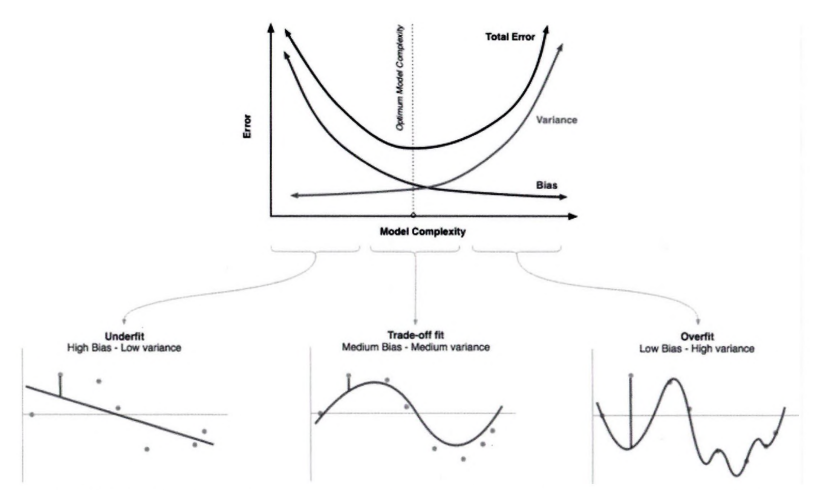

- 편향 & 분산: 한쪽이 높으면 한쪽이 낮아지는 경향
    - 편향이 높으면 분산은 낮아지고(과소적합)
    - 분산이 높으면 편향이 낮아짐(과적합)
- 편향이 너무 높으면 전체 오류가 높음
- 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아지게 됨.
- 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 '골디락스' 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하됨.

---

- 높은 편향/낮은 분산에서 과소적합되기 쉬움.
- 낮은 편향/높은 분산에서 과적합되기 쉬움.

- 가장 효율적인 머신러닝 예측 모델을 만드는 방법: 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것
